# Start up case study Analysis

Problem statement : The dataset provided here contains information about Indian Startups from 2015-2017 , investor's name , amount invested , location of startups and a lot more things . Following useful insights can be taken out of this data by the analysis done by me . Find out what type of startups are getting funded in the last few years? Who are the important investors? What are the hot fields that get a lot of funding these days?

# Importing Libraries

In [2]:
#for manipulations
import numpy as np
import pandas as pd

#for Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style = 'darkgrid'

# Reading dataset

In [3]:
df = pd.read_csv('startup_funding.csv')

In [5]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
df.shape

(2372, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


# Data Cleaning :

In [6]:
df.drop(columns='SNo',axis = 1,inplace = True)

In [7]:
df.drop(['Remarks'],axis=1,inplace=True)

In [8]:
df.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"


In [9]:
df['AmountInUSD'] = df['AmountInUSD'].str.replace(',','')

In [10]:
## Percentage of null values :

round(df.isnull().sum()/len(df)*100,2)

Date                 0.00
StartupName          0.00
IndustryVertical     7.21
SubVertical         39.46
CityLocation         7.55
InvestorsName        0.34
InvestmentType       0.04
AmountInUSD         35.71
dtype: float64

In [11]:
## Replacing the null values with zero as they have not received any fund.
df['AmountInUSD'] = df['AmountInUSD'].fillna(0)

In [16]:
df['AmountInUSD'] = df['AmountInUSD'].astype(int)

In [17]:
df['AmountInUSD']

0       1300000
1             0
2             0
3        500000
4        850000
         ...   
2367    4500000
2368     825000
2369    1500000
2370          0
2371     140000
Name: AmountInUSD, Length: 2372, dtype: int32

# What is the general amount Startups get in India?

In [19]:
# Max. funding of a startup :
print('Maximum funding got by a startup :',df['AmountInUSD'].max())

Maximum funding got by a startup : 1400000000


In [24]:
# Startup's with 50+ Crore fundings :
max_fundings = df[df['AmountInUSD'] >= 500000000].reset_index()
max_fundings

,index,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,158,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1400000000
1,294,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1400000000
2,1572,18/11/2015,Ola,Car Aggregator & Retail Mobile App,NaN,Bangalore,"Baillie Gifford, Falcon Edge Capital, Tiger Gl...",Private Equity,500000000
3,1787,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,680000000
4,1798,01/08/2015,Snapdeal,Ecommerce Marketplace,NaN,New Delhi,"Alibaba, Foxconn, Softbank",Private Equity,500000000
5,1976,28/7/2015,Flipkart.com,Online Marketplace,NaN,Bangalore,Steadview Capital and existing investors,Private Equity,700000000


So, we can see that there are 6 startups who got a funding of 50+ Crore.

In [26]:
## Different ventures of Paytm :
df[df['StartupName'] == 'Paytm']

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
158,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1400000000
821,30/8/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,60000000
1787,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,680000000
2218,13/03/2015,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,0
2276,05/02/2015,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,0


In [28]:
## Minimum funding of a startup :
print('Minimum funding of a startup :',df['AmountInUSD'].min())

Minimum funding of a startup : 0


In [30]:
## Startups with least funding :
df['AmountInUSD'].sort_values().head(5)

1185    0
1378    0
1377    0
617     0
1375    0
Name: AmountInUSD, dtype: int32

In [33]:
df[df['AmountInUSD'] == 0].shape

(847, 8)

There are 847 startups with no funding.

In [58]:
startup_name = df['StartupName'].value_counts().head(8)
startup_name

Swiggy       7
UrbanClap    6
Medinfi      5
Jugnoo       5
Paytm        5
NoBroker     5
Voonik       4
Byju’s       4
Name: StartupName, dtype: int64

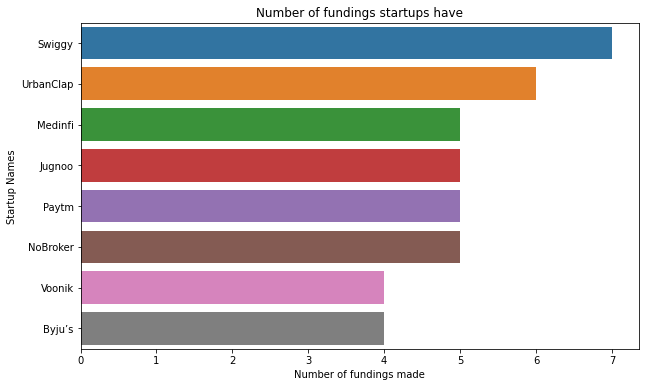

In [59]:
## Startups with most no. of fundings : 

plt.figure(figsize = (10,6))
sns.barplot(y = startup_name.index, x = startup_name.values)
plt.xlabel('Number of fundings made')
plt.ylabel('Startup Names')
plt.title('Number of fundings startups have')
plt.show()

Swiggy has got the maximum funding i.e. 7 times.

In [63]:
## Analyzing the industry of startups :
df['IndustryVertical'].replace('nan','Consumer Technology',inplace = True)

In [69]:
industry_vertical = df['IndustryVertical'].value_counts().head(10)
industry_vertical

Consumer Internet    772
Technology           313
eCommerce            171
ECommerce             53
Healthcare            30
Logistics             24
Education             20
Food & Beverage       19
Finance                9
Others                 6
Name: IndustryVertical, dtype: int64

Text(0.5, 1.0, 'Industry verticals')

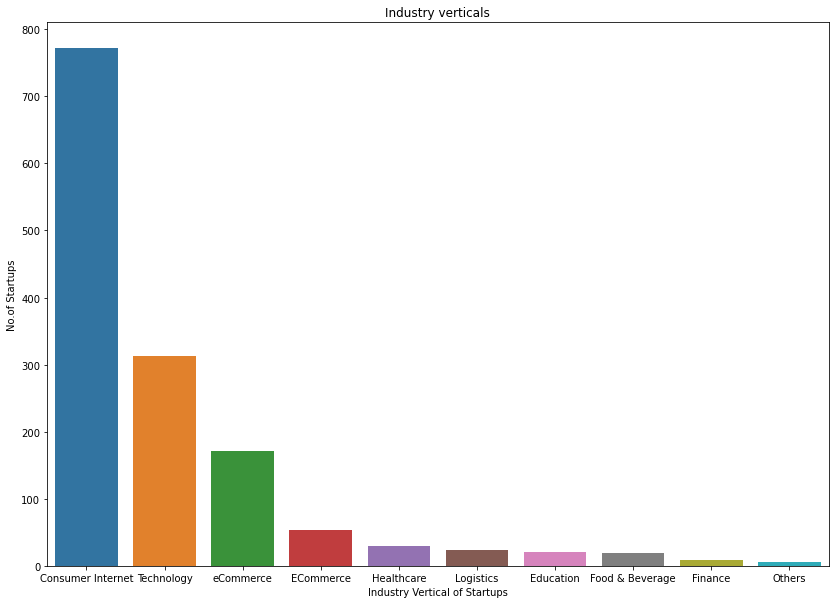

In [74]:
plt.figure(figsize = (14,10))
sns.barplot(x = industry_vertical.index, y = industry_vertical.values)
plt.xlabel('Industry Vertical of Startups')
plt.ylabel('No.of Startups')
plt.title('Industry verticals')

Maximum no. of startups are of Consumer Internet industry vertical.

In [93]:
## Analyzing the sub - vertical column :
sub_vertical = df['SubVertical'].value_counts().head(10)
sub_vertical

Online Pharmacy                   9
Food Delivery Platform            8
Online lending platform           5
Online Learning Platform          4
ECommerce Marketplace             3
Online Payment Gateway            3
Fitness Mobile App                3
Data Analytics platform           3
Food Ordering Mobile App          2
Healthy Food Delivery platform    2
Name: SubVertical, dtype: int64

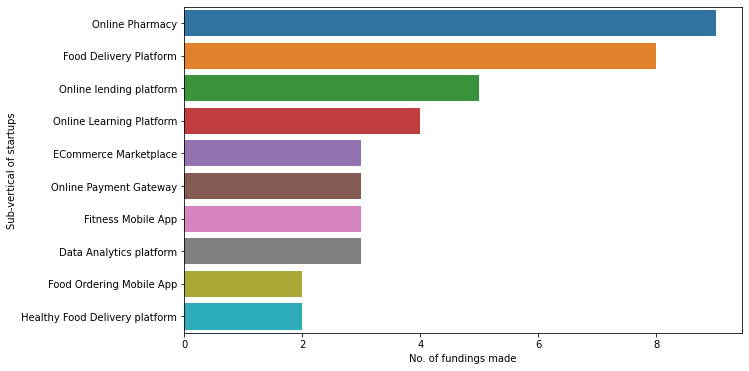

In [95]:
plt.figure(figsize = (10,6))
sns.barplot(y = sub_vertical.index, x = sub_vertical.values)
plt.xlabel('No. of fundings made')
plt.ylabel('Sub-vertical of startups')
plt.show()

Online Pharmacy has got the maximum number of fundings.

In [104]:
## Analyzing the city_location of startups :
city_location = df['CityLocation'].value_counts().head(10)

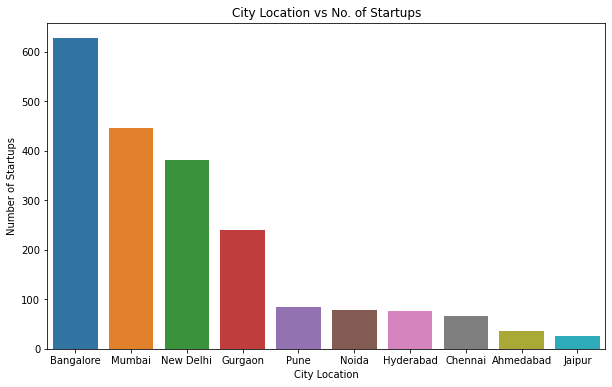

In [105]:
plt.figure(figsize = (10,6))
sns.barplot(x = city_location.index, y = city_location.values)
plt.xlabel('City Location')
plt.ylabel('Number of Startups')
plt.title('City Location vs No. of Startups')
plt.show()

Bangalore has the maximum no. of Startups.

# Who plays the main role in Indian Startups Ecosystem?

In [106]:
## Analyzing the investment :
df['InvestmentType'].value_counts()

Seed Funding      1271
Private Equity    1066
SeedFunding         30
Debt Funding         1
PrivateEquity        1
Crowd funding        1
Crowd Funding        1
Name: InvestmentType, dtype: int64

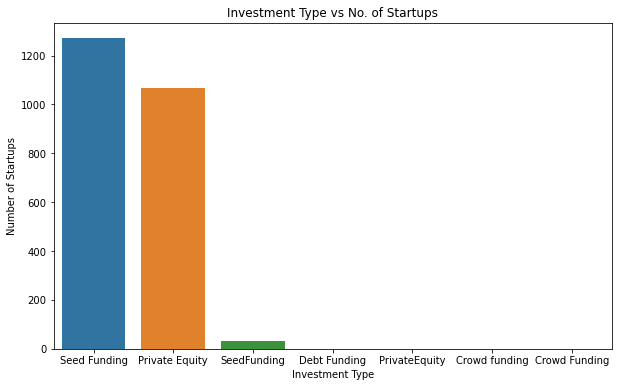

In [109]:
plt.figure(figsize = (10,6))
sns.barplot(x = df['InvestmentType'].value_counts().index, y = df['InvestmentType'].value_counts().values)
plt.xlabel('Investment Type')
plt.ylabel('Number of Startups')
plt.title('Investment Type vs No. of Startups')
plt.show()

Seed Funding & Private Equity are the 2 major investment types.

In [110]:
df.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,0
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,0
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000


In [113]:
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace = True)

In [117]:
df['InvestorsName'].value_counts().head(5)

Undisclosed Investors       60
Ratan Tata                  24
Indian Angel Network        24
Kalaari Capital             16
Group of Angel Investors    15
Name: InvestorsName, dtype: int64

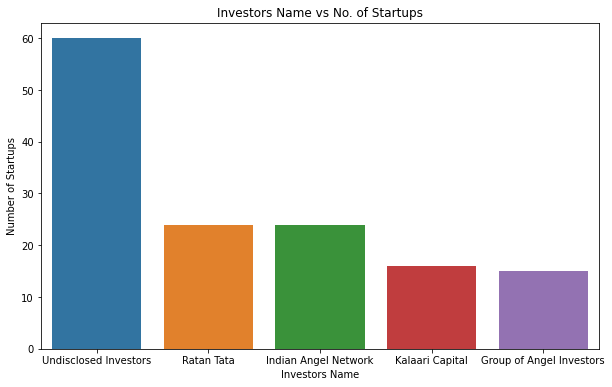

In [119]:
plt.figure(figsize = (10,6))
sns.barplot(x = df['InvestorsName'].value_counts().head(5).index, y = df['InvestorsName'].value_counts().head(5).values)
plt.xlabel('Investors Name')
plt.ylabel('Number of Startups')
plt.title('Investors Name vs No. of Startups')
plt.show()

Most of the investors prefer not disclosing themselves.... followed by Ratan Tata & Indian Angel Network funded the most.

# Conclusion

Based on the above data,we analyse about the Indian Startups and their Investors.EDA is performed and using seaborn and matplotlib libraries we visualize various insights like maximum and minimum funding of Indian startups,and finding the insights of top five Investors name and startups.  